# Prática: regressão com dataset Iris

**Objetivo**: Treinar um modelo de regressão utilizando arvore de decisão para prever um valor numérico (comprimento da sépala), utilizando o dataset Iris.

In [5]:
#install.packages("rpart")
#install.packages("forecast")
library(rpart)
library(forecast)

In [4]:
# dados
iris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


In [6]:
# bases treino e teste
set.seed(42)
indices_treino <- sample(1:nrow(iris), 0.8 * nrow(iris))

dados_treino <- iris[indices_treino,]
dados_teste <- iris[-indices_treino,]

dim(dados_treino)
dim(dados_teste)

[1] 120   5

[1] 30  5

In [8]:
# modelo com arvore de decisao
modelo <- rpart(Sepal.Length ~ Sepal.Width + Petal.Length + Species, data = dados_treino)
modelo

n= 120 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 120 86.259920 5.824167  
   2) Petal.Length< 4.25 61 11.293110 5.175410  
     4) Petal.Length< 3.4 44  4.756364 4.990909  
       8) Sepal.Width< 3.25 19  1.081053 4.731579 *
       9) Sepal.Width>=3.25 25  1.426400 5.188000 *
     5) Petal.Length>=3.4 17  1.162353 5.652941 *
   3) Petal.Length>=4.25 59 22.748470 6.494915  
     6) Petal.Length< 5.65 42  7.836190 6.209524  
      12) Sepal.Width< 3.05 30  4.987000 6.090000 *
      13) Sepal.Width>=3.05 12  1.349167 6.508333 *
     7) Petal.Length>=5.65 17  3.040000 7.200000 *

In [9]:
# sumario
summary(modelo)

Call:
rpart(formula = Sepal.Length ~ Sepal.Width + Petal.Length + Species, 
    data = dados_treino)
  n= 120 

          CP nsplit rel error    xerror       xstd
1 0.60536028      0 1.0000000 1.0228262 0.10945362
2 0.13763385      1 0.3946397 0.4579395 0.05973661
3 0.06230470      2 0.2570059 0.3121192 0.03543150
4 0.02607133      3 0.1947012 0.2588790 0.03248278
5 0.01738958      4 0.1686298 0.2262989 0.03014343
6 0.01000000      5 0.1512403 0.2016108 0.02756773

Variable importance
Petal.Length      Species  Sepal.Width 
          53           30           17 

Node number 1: 120 observations,    complexity param=0.6053603
  mean=5.824167, MSE=0.7188326 
  left son=2 (61 obs) right son=3 (59 obs)
  Primary splits:
      Petal.Length < 4.25 to the left,  improve=0.60536030, (0 missing)
      Species      splits as  LRR,      improve=0.50208890, (0 missing)
      Sepal.Width  < 3.35 to the right, improve=0.03880401, (0 missing)
  Surrogate splits:
      Species     splits as  LLR,    

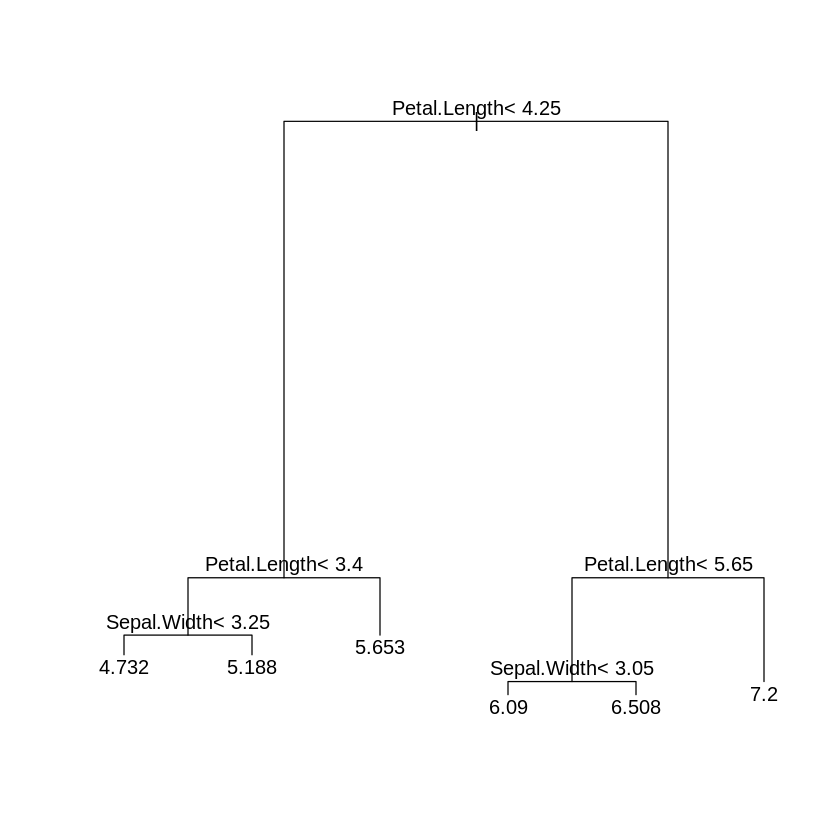

In [10]:
# visualizando a arvore de decisao
plot(modelo)
text(modelo)

In [12]:
# previsoes
predicao <- predict(modelo, dados_teste)
head(predicao)

7    11    12    19    23    28 
5.188 5.188 5.188 5.188 5.188 5.188

In [13]:
# comparando as previsoes com dados reais
comparacao <- cbind(
  predicao, # previsao do modelo
  dados_teste$Sepal.Length, # dados reais
  predicao - dados_teste$Sepal.Length # diferença entre prev e reais
)
head(comparacao)

,predicao,,
7,5.188,4.6,0.588
11,5.188,5.4,-0.212
12,5.188,4.8,0.388
19,5.188,5.7,-0.512
23,5.188,4.6,0.588
28,5.188,5.2,-0.012


In [14]:
# metricas do modelo
accuracy(predicao, dados_teste$Petal.Length)

,ME,RMSE,MAE,MPE,MAPE
Test set,-2.003591,2.314573,2.003591,-96.89496,96.89496


ME indica que o modelo está subestimando, tanto RMSE e MAE com erro medio de 2 unidades e MPE e MAPE com grandes erros percentuais.

In [17]:
# ajustando hiperparametros
modelo_ajustado <- rpart(Sepal.Length ~ Sepal.Width + Petal.Length + Species,
                          data = dados_treino,
                          method = "anova",      # especifica que é um modelo de regressão
                          control = rpart.control(
                            maxdepth = 5,        # profundidade máxima da árvore
                            minsplit = 20,       # mínimo de observações para tentar dividir um nó
                            minbucket = 7,       # mínimo de observações em um nó terminal (folha)
                            cp = 0.01            # penalização ajusta a poda da árvore
                          ))

In [18]:
modelo_ajustado
summary(modelo_ajustado)

n= 120 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 120 86.259920 5.824167  
   2) Petal.Length< 4.25 61 11.293110 5.175410  
     4) Petal.Length< 3.4 44  4.756364 4.990909  
       8) Sepal.Width< 3.25 19  1.081053 4.731579 *
       9) Sepal.Width>=3.25 25  1.426400 5.188000 *
     5) Petal.Length>=3.4 17  1.162353 5.652941 *
   3) Petal.Length>=4.25 59 22.748470 6.494915  
     6) Petal.Length< 5.65 42  7.836190 6.209524  
      12) Sepal.Width< 3.05 30  4.987000 6.090000 *
      13) Sepal.Width>=3.05 12  1.349167 6.508333 *
     7) Petal.Length>=5.65 17  3.040000 7.200000 *

Call:
rpart(formula = Sepal.Length ~ Sepal.Width + Petal.Length + Species, 
    data = dados_treino, method = "anova", control = rpart.control(maxdepth = 5, 
        minsplit = 20, minbucket = 7, cp = 0.01))
  n= 120 

          CP nsplit rel error    xerror       xstd
1 0.60536028      0 1.0000000 1.0236329 0.11067080
2 0.13763385      1 0.3946397 0.4763262 0.06125625
3 0.06230470      2 0.2570059 0.3347907 0.04231221
4 0.02607133      3 0.1947012 0.2899223 0.03507471
5 0.01738958      4 0.1686298 0.2400775 0.03007982
6 0.01000000      5 0.1512403 0.2315420 0.03071541

Variable importance
Petal.Length      Species  Sepal.Width 
          53           30           17 

Node number 1: 120 observations,    complexity param=0.6053603
  mean=5.824167, MSE=0.7188326 
  left son=2 (61 obs) right son=3 (59 obs)
  Primary splits:
      Petal.Length < 4.25 to the left,  improve=0.60536030, (0 missing)
      Species      splits as  LRR,      improve=0.50208890, (0 missing)
      Sepal.Width  < 3

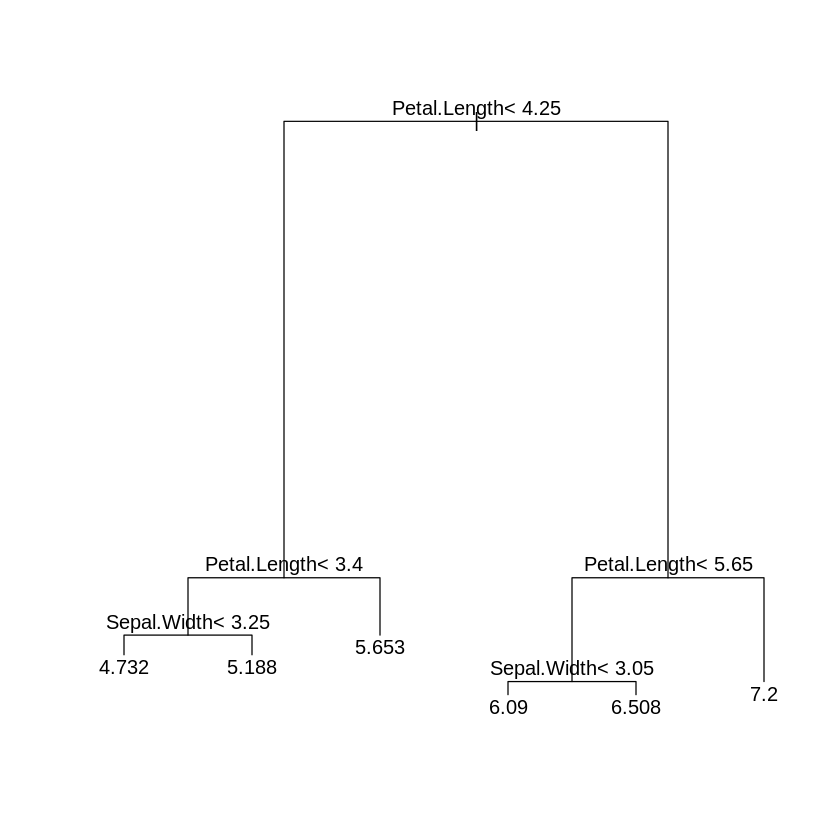

In [19]:
# visualizando a arvore do modelo ajustado
plot(modelo_ajustado)
text(modelo_ajustado)

In [20]:
# previsao
predicao_ajustada <- predict(modelo_ajustado, dados_teste)
predicao_ajustada

7       11       12       19       23       28       37       45 
5.188000 5.188000 5.188000 5.188000 5.188000 5.188000 5.188000 5.188000 
      46       51       52       56       59       70       75       78 
4.731579 6.508333 6.508333 6.090000 6.090000 5.652941 6.090000 6.090000 
      79       82       91       95      101      106      112      116 
6.090000 5.652941 6.090000 5.652941 7.200000 7.200000 6.090000 6.508333 
     117      127      133      134      137      148 
6.090000 6.090000 6.090000 6.090000 6.508333 6.090000

In [21]:
# comparando previsoes com valores reais
comparacao_ajustada <- cbind(
  predicao_ajustada,
  dados_teste$Sepal.Length,
  predicao_ajustada - dados_teste$Sepal.Length
)
head(comparacao_ajustada)

,predicao_ajustada,,
7,5.188,4.6,0.588
11,5.188,5.4,-0.212
12,5.188,4.8,0.388
19,5.188,5.7,-0.512
23,5.188,4.6,0.588
28,5.188,5.2,-0.012


In [22]:
# metricas
accuracy(predicao_ajustada, dados_teste$Sepal.Length)

,ME,RMSE,MAE,MPE,MAPE
Test set,0.02974214,0.3824413,0.316797,0.05057544,5.390104


Agora com hiperparametros ajustados os resultados são bem positivos e indicam que o modelo está fazendo boas previsões, com ME em equilibrio, RSME e MAE baixos o que sugere previsoes mais precisas e MPE e MAPE pequenos indicando um desempenho favorável em termos de previsões percentuais.